In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.stats import mannwhitneyu
nltk.download('all')

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package ave

True

In [2]:
data = pd.read_csv('data/kam-hing-bakery/csv/detailed-reviews-of-kam-hing-bakery.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Kam Hing Coffee Shop,5,NaN,2024-03-02 16:57:03.883507
1,Kam Hing Coffee Shop,5,NaN,2024-03-01 16:57:03.891277
2,Kam Hing Coffee Shop,5,Classic sponge cake so fresh and only one doll...,2024-02-26 16:57:03.894612
3,Kam Hing Coffee Shop,5,100% recommend. GREAT quality for the price. $...,2024-02-25 16:57:03.898152
4,Kam Hing Coffee Shop,5,The cakes are so frikin good !!,2024-02-25 16:57:03.901296
...,...,...,...,...
553,Kam Hing Coffee Shop,5,Good coffee,2023-08-03 16:58:23.168597
554,Kam Hing Coffee Shop,4,the sponge cake is my favorite light snack whe...,2023-04-03 16:58:23.171925
555,Kam Hing Coffee Shop,5,The lady at the front is sweet and I went ther...,2023-03-03 16:58:23.174463
556,Kam Hing Coffee Shop,3,Quick fast place for short fast rice roll and ...,2022-03-03 16:58:23.176893


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_70454/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Kam Hing Coffee Shop,5,NaN,2024
1,Kam Hing Coffee Shop,5,NaN,2024
2,Kam Hing Coffee Shop,5,Classic sponge cake so fresh and only one doll...,2024
3,Kam Hing Coffee Shop,5,100% recommend. GREAT quality for the price. $...,2024
4,Kam Hing Coffee Shop,5,The cakes are so frikin good !!,2024
...,...,...,...,...
553,Kam Hing Coffee Shop,5,Good coffee,2023
554,Kam Hing Coffee Shop,4,the sponge cake is my favorite light snack whe...,2023
555,Kam Hing Coffee Shop,5,The lady at the front is sweet and I went ther...,2023
556,Kam Hing Coffee Shop,3,Quick fast place for short fast rice roll and ...,2022


Charts for ratings

<AxesSubplot:xlabel='rating'>

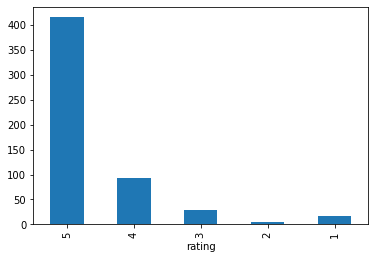

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

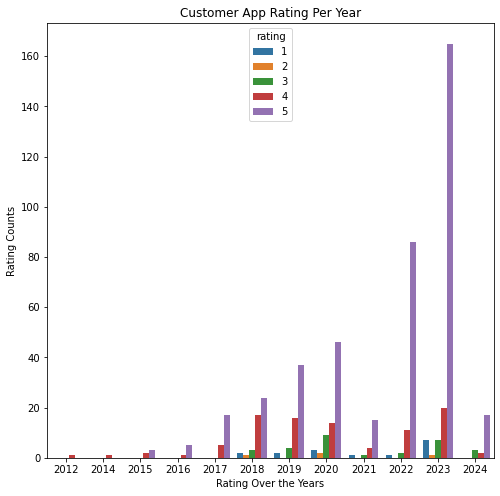

In [5]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [6]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_70454/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,<NA>
1,<NA>
2,Classic sponge cake so fresh and only one doll...
3,100% recommend. GREAT quality for the price. $...
4,The cakes are so frikin good !!
...,...
553,Good coffee
554,the sponge cake is my favorite light snack whe...
555,The lady at the front is sweet and I went ther...
556,Quick fast place for short fast rice roll and ...


In [7]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [8]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_70454/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Kam Hing Coffee Shop,5,<NA>,2024,
1,Kam Hing Coffee Shop,5,<NA>,2024,
2,Kam Hing Coffee Shop,5,Classic sponge cake so fresh and only one doll...,2024,classic spong cake fresh dollar
3,Kam Hing Coffee Shop,5,100% recommend. GREAT quality for the price. $...,2024,recommend great qualiti price doesn nyc
4,Kam Hing Coffee Shop,5,The cakes are so frikin good !!,2024,cake frikin good


In [9]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('cake', 417),
 ('spong', 338),
 ('flavor', 119),
 ('place', 98),
 ('good', 93),
 ('coffe', 85),
 ('origin', 63),
 ('tea', 62),
 ('great', 58),
 ('delici', 56),
 ('chinatown', 52),
 ('price', 46),
 ('love', 41),
 ('soft', 39),
 ('tast', 36),
 ('day', 35),
 ('sweet', 32),
 ('cheap', 32),
 ('back', 30),
 ('green', 29),
 ('ice', 28),
 ('friendli', 28),
 ('fluffi', 27),
 ('amaz', 27),
 ('fresh', 26),
 ('shop', 26),
 ('chocol', 26),
 ('super', 25),
 ('time', 24),
 ('ube', 24),
 ('drink', 24),
 ('recommend', 23),
 ('chip', 23),
 ('eat', 22),
 ('nice', 21),
 ('moist', 21),
 ('kam', 20),
 ('town', 20),
 ('staff', 20),
 ('spot', 20),
 ('favorit', 19),
 ('servic', 19),
 ('stop', 19),
 ('bakeri', 19),
 ('hing', 19),
 ('make', 19),
 ('street', 18),
 ('chines', 18),
 ('nyc', 17),
 ('wall', 17)]

In [10]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_70454/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Kam Hing Coffee Shop,5,<NA>,2024,,1
1,Kam Hing Coffee Shop,5,<NA>,2024,,1
2,Kam Hing Coffee Shop,5,Classic sponge cake so fresh and only one doll...,2024,classic spong cake fresh dollar,1
3,Kam Hing Coffee Shop,5,100% recommend. GREAT quality for the price. $...,2024,recommend great qualiti price doesn nyc,1
4,Kam Hing Coffee Shop,5,The cakes are so frikin good !!,2024,cake frikin good,1
...,...,...,...,...,...,...
553,Kam Hing Coffee Shop,5,Good coffee,2023,good coffe,1
554,Kam Hing Coffee Shop,4,the sponge cake is my favorite light snack whe...,2023,spong cake favorit light snack run errand chin...,1
555,Kam Hing Coffee Shop,5,The lady at the front is sweet and I went ther...,2023,ladi front sweet lot peopl lemon spong cake fr...,1
556,Kam Hing Coffee Shop,3,Quick fast place for short fast rice roll and ...,2022,quick fast place short fast rice roll sandwich...,0


<AxesSubplot:xlabel='sentiment', ylabel='count'>

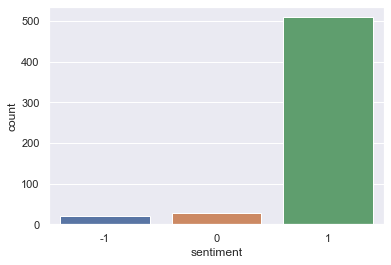

In [11]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [12]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_70454/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0      0.0000
1      0.0000
2      0.3182
3      0.7650
4      0.4404
        ...  
553    0.4404
554    0.5574
555    0.7096
556    0.0000
557    0.0000
Name: review_sentiment, Length: 558, dtype: float64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

years = df['published_at_date']

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X,y, years)

In [14]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

clf = LinearSVC(random_state=0)

clf.fit(X_train,y_train)

y_test_pred=clf.predict(X_test)

report=classification_report(y_test, y_test_pred, output_dict=True)
report

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'-1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8},
 '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11},
 '1': {'precision': 0.8642857142857143,
  'recall': 1.0,
  'f1-score': 0.9272030651340997,
  'support': 121},
 'accuracy': 0.8642857142857143,
 'macro avg': {'precision': 0.2880952380952381,
  'recall': 0.3333333333333333,
  'f1-score': 0.3090676883780332,
  'support': 140},
 'weighted avg': {'precision': 0.7469897959183674,
  'recall': 0.8642857142857143,
  'f1-score': 0.801368363437329,
  'support': 140}}

In [15]:
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency

predictions_df = pd.DataFrame({'Sentiment': y_test_pred, 'Years': years_test})

# Create a contingency table
contingency_table = pd.crosstab(predictions_df['Sentiment'], predictions_df['Years'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)
print("Expected frequencies:\n", expected)
print("Contingency table:\n", contingency_table)

Chi-square statistic: 0.0
Degrees of freedom: 0
p-value: 1.0
Expected frequencies:
 [[ 1.  2. 10. 13. 14. 18.  8. 26. 46.  2.]]
Contingency table:
 Years      2012  2016  2017  2018  2019  2020  2021  2022  2023  2024
Sentiment                                                            
1             1     2    10    13    14    18     8    26    46     2


In [16]:
# Wilcoxon rank-sum / Mann-whitney U Test
year = 2020

before_data = df[df['published_at_date'] < year]
after_data = df[df['published_at_date'] >= year]

u_stat, p_value_mw = mannwhitneyu(before_data['review_sentiment'], after_data['review_sentiment'])
print("Mann-Whitney U test - U-statistic:", u_stat, "p-value:", p_value_mw)

Mann-Whitney U test - U-statistic: 27785.0 p-value: 0.29430961785376486


In [17]:
# make altered data into csv file
df.to_csv('altdata/' + 'kamhing.csv', index=False)